In [3]:
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import shap
import pyarrow.parquet as pq


In [4]:
# load model
model = joblib.load("/home/jovyan/work/github_projs/citiproj/citi-documentation-test/models/lgbm_model.pkl")
#load X_train
X_train = (
    pq.read_table("/home/jovyan/work/github_projs/citiproj/citi-documentation-test/data/processed/X_train.parquet")
    .to_pandas()
    )

savefig() got unexpected keyword argument "show" which is no longer supported as of 3.3 and will become an error in 3.6


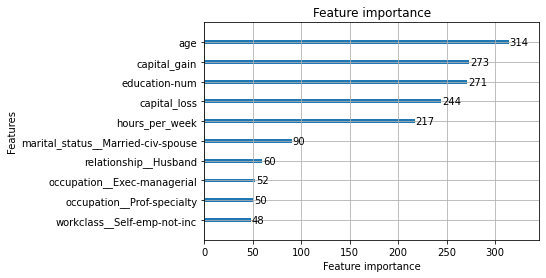

In [20]:
# plot feature importance
lgb.plot_importance(model, max_num_features=10)
plt.savefig('/home/jovyan/work/github_projs/citiproj/citi-documentation-test/reports/figures/model_feature_importance.jpg',
 bbox_inches = 'tight', dpi = 500, show = False)

In [5]:
# SHAP
#Get shap values

# compute the SHAP values for the linear model
X100 = shap.utils.sample(X_train, 100)
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_train)

Permutation explainer: 32562it [19:33, 27.39it/s]                           


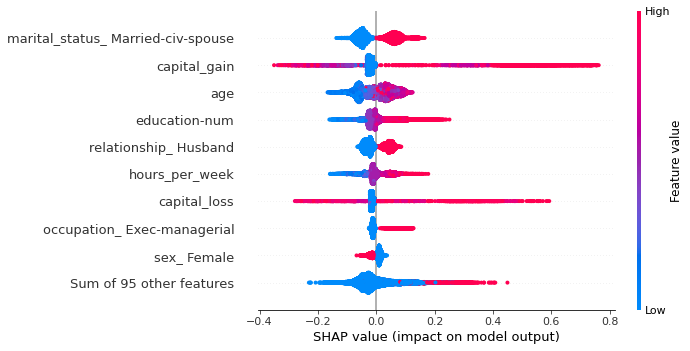

In [18]:
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('/home/jovyan/work/github_projs/citiproj/citi-documentation-test/reports/figures/model_shap_bs.jpg', 
bbox_inches = 'tight', dpi=500)

